Using `sobol-kj` implementation, test whether a random catalog generated using Sobol quasi-random numbers result in $w_p$ that converges with lower $N_r$. 

In [1]:
import numpy as np 
# -- halotools -- (w_p calculation)
from halotools.mock_observables import angular_tpcf as Wp
# -- local --
import env
import util as UT
import sobol as Sob
from ChangTools.fitstables import mrdfits

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Lets start with some tests of the Sobol quasi-random vs pseudo-random

In [3]:
N_random = 100 
v1 = Sob.sobol(N_random, 2)
v2 = np.random.uniform(size=(N_random, 2))

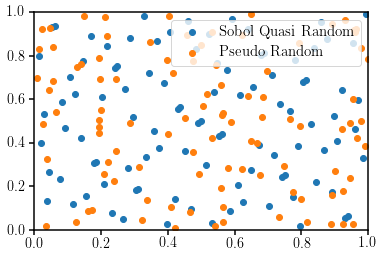

In [4]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(v1[:,0], v1[:,1], label='Sobol Quasi Random')
sub.scatter(v2[:,0], v2[:,1], label='Pseudo Random')
sub.set_xlim([0., 1.])
sub.set_ylim([0., 1.])
leg = sub.legend(loc='upper right', frameon=True, facecolor='#ffffff', prop={'size': 15})
plt.show()

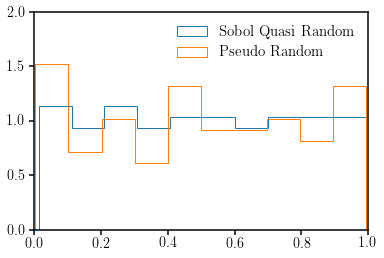

In [5]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(v1[:,0], histtype='step', normed=True, label='Sobol Quasi Random')
_ = sub.hist(v2[:,1], histtype='step', normed=True, label='Pseudo Random')
sub.set_xlim([0., 1.])
sub.set_ylim([0., 2.])
sub.legend(loc='upper right', prop={'size': 15})

Lets take a sliver of the CMASS galaxies

In [6]:
data = mrdfits(UT.dat_dir()+'galaxy_DR12v5_CMASS_North.fits')
zlim = (data.z > 0.49) & (data.z < 0.5)

In [7]:
print np.sum(zlim), ' galaxies'

31763  galaxies


(-5.0, 70.0)

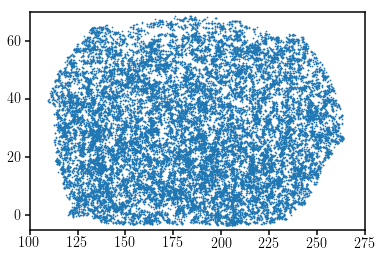

In [8]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(data.ra[zlim], data.dec[zlim], s=0.5)
sub.set_xlim([100., 275.])
sub.set_ylim([-5., 70.])

For simplicity cut out a $RA$ and $Dec$ box

In [9]:
box = (data.ra > 150.) & (data.ra < 225.) & (data.dec > 10.) & (data.dec < 50.)

(-5.0, 70.0)

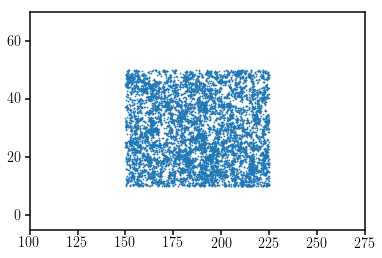

In [10]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(data.ra[zlim & box], data.dec[zlim & box], s=0.5)
sub.set_xlim([100., 275.])
sub.set_ylim([-5., 70.])

In [11]:
subsample = (zlim & box)

In [12]:
subdata = np.zeros((np.sum(subsample), 2))
subdata[:,0] = data.ra[subsample]
subdata[:,1] = data.dec[subsample]

In [13]:
theta_bin = np.logspace(np.log10(0.003), 0, 10)

In [14]:
def Wp_Sobol(Nr): 
    subrandom = Sob.sobol(Nr, 2)
    subrandom[:,0] *= 75. 
    subrandom[:,0] += 150.
    subrandom[:,1] *= 40.
    subrandom[:,1] += 10.
    
    w_p = Wp(subdata, theta_bin, randoms=subrandom, estimator='Landy-Szalay')
    return w_p

In [15]:
def Wp_Pseudo(Nr): 
    subrandom = np.random.uniform(size=(Nr, 2))
    subrandom[:,0] *= 75. 
    subrandom[:,0] += 150.
    subrandom[:,1] *= 40.
    subrandom[:,1] += 10.
    
    w_p = Wp(subdata, theta_bin, randoms=subrandom, estimator='Landy-Szalay')
    return w_p

No labelled objects found. Use label='...' kwarg on individual plots.


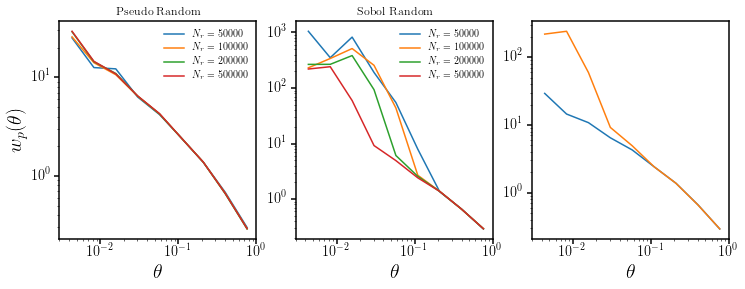

In [17]:
fig = plt.figure(figsize=(12,4)) 
sub1 = fig.add_subplot(131)
sub2 = fig.add_subplot(132)

for Nr in [50000, 100000, 200000, 500000]: 
    wp_p = Wp_Pseudo(Nr)
    sub1.plot(0.5*(theta_bin[1:]+theta_bin[:-1]), wp_p, label='$N_r='+str(Nr)+'$')
    wp_s = Wp_Sobol(Nr)
    sub2.plot(0.5*(theta_bin[1:]+theta_bin[:-1]), wp_s, label='$N_r='+str(Nr)+'$')
sub1.set_xscale('log')
sub1.set_xlim([0.003, 1.])
sub1.set_xlabel(r'$\theta$', size=20)
sub1.set_yscale('log')
sub1.set_ylabel(r'$w_p(\theta)$', size=20)
sub1.legend(loc='upper right')
sub1.set_title('Pseudo Random')

sub2.set_xscale('log')
sub2.set_xlim([0.003, 1.])
sub2.set_xlabel(r'$\theta$', size=20)
sub2.set_yscale('log')
#sub2.set_ylabel(r'$w_p(\theta)$', size=20)
sub2.legend(loc='upper right')
sub2.set_title('Sobol Random')

sub = fig.add_subplot(133)
sub.plot(0.5*(theta_bin[1:]+theta_bin[:-1]), wp_p)
sub.plot(0.5*(theta_bin[1:]+theta_bin[:-1]), wp_s)
sub.set_xscale('log')
sub.set_xlim([0.003, 1.])
sub.set_xlabel(r'$\theta$', size=20)
sub.set_yscale('log')
sub.legend(loc='upper right')